# Team 4B - "Analysis of McDonald's menu"

In [784]:
# Set up the environment
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sma
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import plotly.express as px
%matplotlib inline

# Data import

In [498]:
# Import the datasets
nutrition=pd.read_csv("1. nutrition.csv", nrows=270)
items=pd.read_csv("2. item.csv", nrows=270)
company=pd.read_csv("3. company.csv", usecols=["YEAR", "STOCK", "REVENUE"])

# Data exploration and cleansing

In [499]:
# Explore the dataset(1) - nutrition
nutrition.describe()
nutrition.info()
nutrition.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [500]:
# Change column names of the "nutrition" dataset to uppercase in order to merge with other datasets
nutrition.columns=nutrition.columns.map(str.upper)
items.columns=items.columns.map(str.upper)
company.columns=company.columns.map(str.upper)

In [525]:
# Keep only the numeric part of the "SERVING SIZE" column, and drop the remaining character part
nutrition["SERVING SIZE"] = nutrition["SERVING SIZE"].apply(lambda x: x.split(" ")[0])

In [522]:
nutrition.head(5)

,CATEGORY,ITEM,SERVING SIZE,CALORIES,CALORIES FROM FAT,TOTAL FAT,TOTAL FAT (% DAILY VALUE),SATURATED FAT,SATURATED FAT (% DAILY VALUE),TRANS FAT,...,CARBOHYDRATES (% DAILY VALUE),DIETARY FIBER,DIETARY FIBER (% DAILY VALUE),SUGARS,PROTEIN,VITAMIN A (% DAILY VALUE),VITAMIN C (% DAILY VALUE),CALCIUM (% DAILY VALUE),IRON (% DAILY VALUE),SIZE UNIT
0,Beverages,1% Low Fat Milk Jug,1,100,20,2.5,4,1.5,8,0.0,...,4,0,0,12,8,10,4,30,0,[]
1,Snacks & Sides,Apple Slices,1.2,15,0,0.0,0,0.0,0,0.0,...,1,0,0,3,0,0,160,2,0,[]
2,Chicken & Fish,Bacon Buffalo Ranch McChicken,5.7,430,190,21.0,32,5.0,25,0.0,...,14,2,7,6,20,2,10,15,15,[]
3,Chicken & Fish,Bacon Cheddar McChicken,6,480,220,24.0,38,7.0,35,0.0,...,14,2,8,6,22,4,10,20,15,[]
4,Beef & Pork,Bacon Clubhouse Burger,9.5,720,360,40.0,62,15.0,75,1.5,...,17,4,14,14,39,8,25,30,25,[]


In [503]:
# Explore the dataset(2) - items
items.describe()
items.info()
items.isna().sum()
# Found some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CATEGORY         266 non-null    object 
 1   ITEM             266 non-null    object 
 2   YEAR             246 non-null    float64
 3   PRICE            241 non-null    float64
 4   CONSUMER RATING  232 non-null    float64
dtypes: float64(3), object(2)
memory usage: 10.5+ KB


CATEGORY            0
ITEM                0
YEAR               20
PRICE              25
CONSUMER RATING    34
dtype: int64

In [504]:
# Found the fact that missing values in the "YEAR" column are coming from the same item names
# And also found that every item has a valid "YEAR" value in its first row
items[items["YEAR"].isna()]
items.head(15)

,CATEGORY,ITEM,YEAR,PRICE,CONSUMER RATING
0,Beef & Pork,Bacon Clubhouse Burger,2014.0,4.49,3.8
1,Beef & Pork,Bacon McDouble,1997.0,2.59,NaN
2,Beef & Pork,Big Mac,1967.0,4.89,NaN
3,Beef & Pork,Cheeseburger,1948.0,1.69,NaN
4,Beef & Pork,Daily Double,2012.0,2.39,NaN
5,Beef & Pork,Double Cheeseburger,1965.0,NaN,NaN
6,Beef & Pork,Double Quarter Pounder with Cheese,2022.0,NaN,NaN
7,Beef & Pork,Hamburger,1948.0,NaN,NaN
8,Beef & Pork,Jalapeno Double,2014.0,NaN,NaN
9,Beef & Pork,McDouble,1997.0,NaN,NaN


In [505]:
# Replace missing values in the "YEAR" column with the valid values of each item name
items["YEAR"]=items["YEAR"].fillna(method="ffill")

In [506]:
# As for the "PRICE" and "CONSUMER RATING" columns, the team decided to replace missing values with the median values of each category
# To do that, the team first created dictionaries containing each median value
price_median=dict(items.groupby("CATEGORY")["PRICE"].median().round(2))
rating_median=dict(items.groupby("CATEGORY")["CONSUMER RATING"].median().round(2))

In [507]:
# And replaced NA values with valid ones according to each category using "map" function.
valid_price_for_na=items[items["PRICE"].isnull()]["CATEGORY"].map(price_median)
items["PRICE"].fillna(valid_price_for_na, inplace=True)
valid_rating_for_na=items[items["CONSUMER RATING"].isnull()]["CATEGORY"].map(rating_median)
items["CONSUMER RATING"].fillna(valid_rating_for_na, inplace=True)

In [508]:
# Finished handling the missing values in the item dataset
items.isnull().sum()

CATEGORY           0
ITEM               0
YEAR               0
PRICE              0
CONSUMER RATING    0
dtype: int64

In [509]:
# Change data type of the "YEAR" column to integer
items["YEAR"] = items["YEAR"].astype("int")

In [510]:
# Conduct discretization on the "CONSUMER RATING" and "PRICE" columns to have additional categorized columns for the analysis

# Create a column named "HIT ITEM" and classify the data with the consumer rating above the overall average as "Yes"

items["HIT ITEM"] = None

mean_rating=items["CONSUMER RATING"].mean()

for i in range(len(items["CONSUMER RATING"])):
    if items["CONSUMER RATING"][i] > mean_rating:
        items["HIT ITEM"][i] = "Yes"
    else:
        items["HIT ITEM"][i] = "No"

C:\Users\jwshin\AppData\Local\Temp\ipykernel_1724\180747253.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items["HIT ITEM"][i] = "No"
C:\Users\jwshin\AppData\Local\Temp\ipykernel_1724\180747253.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items["HIT ITEM"][i] = "Yes"


In [511]:
# Create a column named "PRICE SEG", and classify the upper 25% price as "High", and the lower 25% as "Low"

items["PRICE SEG"] = None

q25 = items["PRICE"].quantile(0.25)
q75 = items["PRICE"].quantile(0.75)

for i in range(len(items["PRICE"])):
    if items["PRICE"][i] >= q75:
        items["PRICE SEG"][i] = "High"
    elif items["PRICE"][i] > q25:
        items["PRICE SEG"][i] = "Mid"
    elif items["PRICE"][i] <= q25:
        items["PRICE SEG"][i] = "Low"


C:\Users\jwshin\AppData\Local\Temp\ipykernel_1724\903090400.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items["PRICE SEG"][i] = "High"
C:\Users\jwshin\AppData\Local\Temp\ipykernel_1724\903090400.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items["PRICE SEG"][i] = "Mid"
C:\Users\jwshin\AppData\Local\Temp\ipykernel_1724\903090400.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items["PRICE SEG"][i] = "Low"


In [514]:
# Explore the dataset(3) - company
company.describe()
company.info()
company.isna().sum()
# Found some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     52 non-null     int64  
 1   STOCK    38 non-null     float64
 2   REVENUE  52 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


YEAR        0
STOCK      14
REVENUE     0
dtype: int64

In [570]:
# Since the missing values are only from the past stock prices
# the team decided not to remove them as they won't affect the analysis
company.head(20)

,YEAR,STOCK,REVENUE
0,1971,NaN,0.0
1,1972,NaN,0.0
2,1973,NaN,0.0
3,1974,NaN,0.0
4,1975,NaN,0.0
5,1976,NaN,0.0
6,1977,NaN,0.0
7,1978,NaN,0.0
8,1979,NaN,0.0
9,1980,NaN,0.0


In [515]:
# Remove "B (Billion)" character in the "REVENUE" column and change the data type to floating point number
company["REVENUE"] = company[company["REVENUE"].notnull()]["REVENUE"].apply(lambda x: x.rstrip("B")).astype("float").round(2)

In [560]:
# Change the data type of the "REVENUE" column to integer
company["REVENUE"]=company["REVENUE"].astype("int")

In [561]:
# Change the unit of the revenue values to a billion
company["REVENUE"] = company["REVENUE"] / 10

In [562]:
# Round the company's stock price and revenue to two decimal places
company["STOCK"]=round(company["STOCK"],2)
company["REVENUE"]=round(company["REVENUE"],2)

In [571]:
company.head()

,YEAR,STOCK,REVENUE
0,1971,NaN,0.0
1,1972,NaN,0.0
2,1973,NaN,0.0
3,1974,NaN,0.0
4,1975,NaN,0.0


In [534]:
# Merge the nutrition and the items to create the "menu" dataset which will be used as the main dataset throughout the anlysis
menu=nutrition.merge(items, on="ITEM", how="left")

In [535]:
menu.columns

Index(['CATEGORY_x', 'ITEM', 'SERVING SIZE', 'CALORIES', 'CALORIES FROM FAT',
       'TOTAL FAT', 'TOTAL FAT (% DAILY VALUE)', 'SATURATED FAT',
       'SATURATED FAT (% DAILY VALUE)', 'TRANS FAT', 'CHOLESTEROL',
       'CHOLESTEROL (% DAILY VALUE)', 'SODIUM', 'SODIUM (% DAILY VALUE)',
       'CARBOHYDRATES', 'CARBOHYDRATES (% DAILY VALUE)', 'DIETARY FIBER',
       'DIETARY FIBER (% DAILY VALUE)', 'SUGARS', 'PROTEIN',
       'VITAMIN A (% DAILY VALUE)', 'VITAMIN C (% DAILY VALUE)',
       'CALCIUM (% DAILY VALUE)', 'IRON (% DAILY VALUE)', 'CATEGORY_y', 'YEAR',
       'PRICE', 'CONSUMER RATING', 'HIT ITEM', 'PRICE SEG'],
      dtype='object')

In [536]:
# Rename some column names, and drop redundant columns, and rearrange the column order for the analysis efficiency
menu.rename({"CATEGORY_x":"CATEGORY"}, axis=1, inplace=True)
menu.drop("CATEGORY_y", axis=1, inplace=True)
menu=menu[['CATEGORY', 'ITEM', 'YEAR', 'PRICE','PRICE SEG', 'CONSUMER RATING','HIT ITEM', 'SERVING SIZE', 'CALORIES', 'CALORIES FROM FAT',
       'TOTAL FAT', 'TOTAL FAT (% DAILY VALUE)', 'SATURATED FAT',
       'SATURATED FAT (% DAILY VALUE)', 'TRANS FAT', 'CHOLESTEROL',
       'CHOLESTEROL (% DAILY VALUE)', 'SODIUM', 'SODIUM (% DAILY VALUE)',
       'CARBOHYDRATES', 'CARBOHYDRATES (% DAILY VALUE)', 'DIETARY FIBER',
       'DIETARY FIBER (% DAILY VALUE)', 'SUGARS', 'PROTEIN',
       'VITAMIN A (% DAILY VALUE)', 'VITAMIN C (% DAILY VALUE)',
       'CALCIUM (% DAILY VALUE)', 'IRON (% DAILY VALUE)']]

# Variable reduction

In [575]:
# As there are too many variables in the main dataset, especially for the nutrition-related variables
# the team decided to conduct the PCA(Principal Component Analysis) to reduce the number of variables 
# and avoid the possibility of multicollinearity

from sklearn.preprocessing import StandardScaler

# Prepare the dataset for the PCA

menu_for_pca = menu.copy()
menu_for_pca.drop(["CATEGORY", "ITEM", "YEAR", "PRICE", "PRICE SEG", "CONSUMER RATING", "HIT ITEM", "SERVING SIZE", "SIZE UNIT"], axis=1, inplace=True)

# Standardize the dataset

menu_stdzed_scalar = StandardScaler().fit_transform(menu_for_pca)
pca_cols = menu_for_pca.columns
menu_stdzed_df=pd.DataFrame(menu_stdzed_scalar, columns=pca_cols)

# Conduct PCA
# The number of principal components was set to six since they can explain more than 90% of the total variance of the dataset

from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca_result = pca.fit_transform(menu_stdzed_df)
menu_pca=pd.DataFrame(data=pca_result, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"])
pd.DataFrame(pca.components_.T, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"], index=menu_x_std.columns)

# The amount of the variance of the dataset explained by the principal components
pca.explained_variance_ratio_.sum().round(2)*100

92.0

In [574]:
# Check the result of the PCA
pd.DataFrame(pca.components_.T, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"], index=menu_x_std.columns)

,PC1,PC2,PC3,PC4,PC5,PC6
CALORIES,0.281450,0.146549,0.040764,0.123799,-0.071725,-0.073446
CALORIES FROM FAT,0.286999,-0.027996,-0.114845,0.105322,-0.078447,0.034784
TOTAL FAT,0.286767,-0.028054,-0.115904,0.105360,-0.081519,0.031679
TOTAL FAT (% DAILY VALUE),0.286855,-0.028196,-0.116586,0.105374,-0.081398,0.033469
SATURATED FAT,0.258345,0.154097,-0.186592,-0.026898,0.016915,0.176477
SATURATED FAT (% DAILY VALUE),0.259178,0.152266,-0.185102,-0.025359,0.017086,0.174896
TRANS FAT,0.145777,0.237023,-0.118857,-0.015990,-0.094003,0.659926
CHOLESTEROL,0.226158,-0.067845,-0.183508,-0.209861,0.561123,-0.131487
CHOLESTEROL (% DAILY VALUE),0.225882,-0.068138,-0.183744,-0.210874,0.561663,-0.132772
SODIUM,0.259209,-0.212998,-0.015725,0.066764,-0.155099,-0.070031


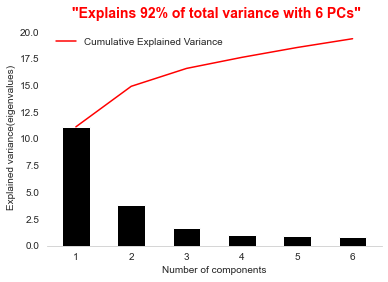

In [1130]:
# Plot the result of the PCA

plt.bar(
range(1, len(pca.explained_variance_)+1),
pca.explained_variance_, color="black", width=0.5
)

plt.plot(
range(1, len(pca.explained_variance_)+1),
np.cumsum(pca.explained_variance_),
c="red",
label="Cumulative Explained Variance")

plt.legend(loc="best", frameon=False)
plt.xlabel("Number of components")
plt.ylabel("Explained variance(eigenvalues)")

plt.title(" \"Explains 92% of total variance with 6 PCs\"", fontsize=14, fontweight="bold", x=0.5, y=1.02, color="red")

plt.gca().spines[ ["right", "left", "top"] ].set_visible(False)  

In [805]:
# Create a new dataset named "menu_pca"
menu_temp=menu[["CATEGORY", "ITEM", "YEAR", "PRICE", "CONSUMER RATING", "HIT ITEM", "SERVING SIZE", "SIZE UNIT"]]
menu_pca=menu_temp.join(menu_pca)

# Analysis - McDonald's Business Performance

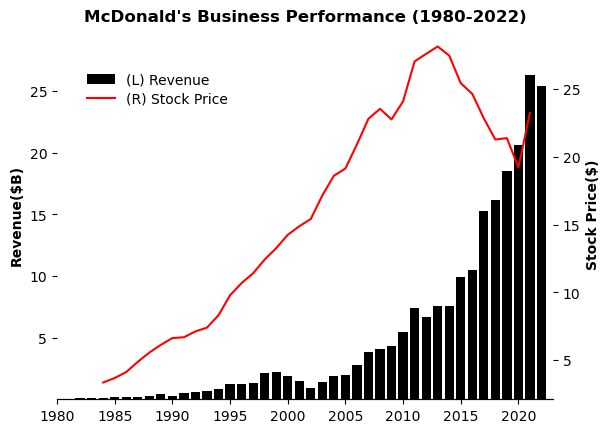

In [573]:
# Plot the revenue and stock prices of McDonald's to see how the company has been doing

plt.style.use("default")
fig, ax1 = plt.subplots(1,1)
ax1.bar(x=company["YEAR"], height=company["REVENUE"], color="black", label="(L) Revenue")
ax1.set_xlim(1980, 2023)
ax1.set_ylim(0,30)
plt.yticks(ticks=[5,10,15,20,25])
plt.ylabel("Revenue($B)", fontdict={"weight":"bold"})
plt.gca().spines[["right", "left", "top"]].set_visible(False)
plt.legend(loc=(0.05, 0.83), frameon=False)

ax2=ax1.twinx()
ax2.plot(company["YEAR"], company["STOCK"], label="(R) Stock Price", color="red")
ax2.tick_params(axis="y", direction="out")
plt.yticks(ticks=[5,10,15,20,25])
plt.ylabel("Stock Price($)", fontdict={"weight":"bold"})
plt.legend(loc=(0.05, 0.78), frameon=False)
plt.title("McDonald's Business Performance (1980-2022)", fontsize=12, fontweight="bold")
plt.gca().spines[["right", "left", "top"]].set_visible(False)


In [579]:
# Looking deeply, we can see that the growth rate is slowing down

# in terms of the revenue,
# CAGR between 2001 ~ 2011 is 17.0%
# CAGR between 2011 ~ 2021 is 13.5%

# in terms of the stock price,
# CAGR between 2001 ~ 2011 is 6.2%
# CAGR between 2011 ~ 2021 is -1.5%%

# Analysis - Descriptive Analysis of the menu

In [581]:
# Check the descriptive statistics of the main dataset for the purpose of the initial data exploration
menu.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,266.0,2003.827068,15.412326,1948.00,1999.00,2009.00,2013.00,2022.00
PRICE,266.0,3.126353,1.491650,0.89,2.00,2.79,3.59,11.69
CONSUMER RATING,266.0,3.861654,0.648856,2.00,3.40,3.90,4.30,5.00
SERVING SIZE,266.0,12.536842,7.191803,1.00,6.40,12.00,16.00,32.00
CALORIES,266.0,363.308271,239.776143,0.00,200.00,335.00,480.00,1880.00
CALORIES FROM FAT,266.0,125.281955,126.977993,0.00,30.00,100.00,200.00,1060.00
TOTAL FAT,266.0,13.973684,14.100424,0.00,3.50,11.00,22.00,118.00
TOTAL FAT (% DAILY VALUE),266.0,21.515038,21.725599,0.00,5.00,17.00,34.00,182.00
SATURATED FAT,266.0,5.924812,5.289183,0.00,1.50,5.00,9.75,20.00
SATURATED FAT (% DAILY VALUE),266.0,29.560150,26.468175,0.00,6.50,24.00,47.75,102.00


In [582]:
# Check the number of items in each category. Coffee & Tea has the most items which can pose a management complexity issue to the company
menu.CATEGORY.value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Beverages             27
Chicken & Fish        27
Beef & Pork           15
Desserts              13
Snacks & Sides        13
Salads                 6
Name: CATEGORY, dtype: int64

C:\Users\jwshin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


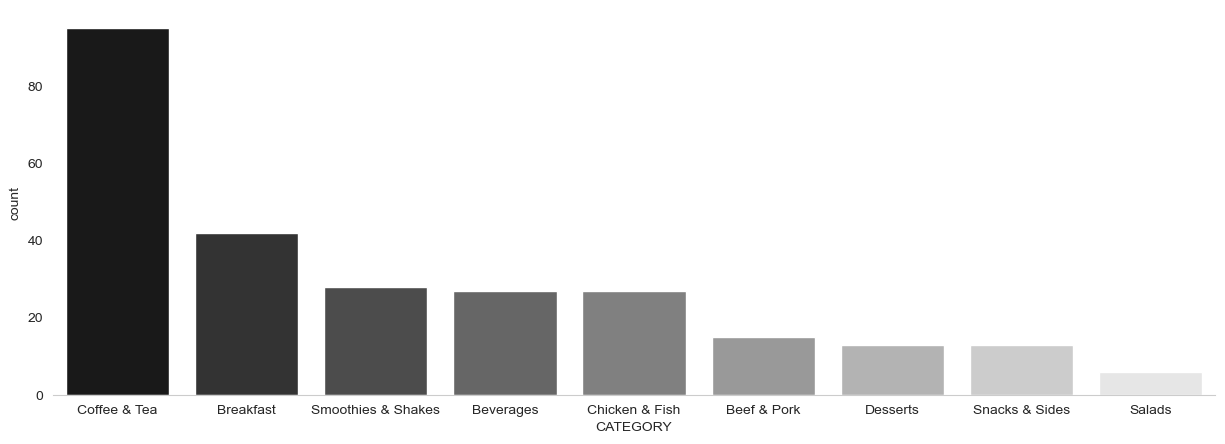

In [585]:
# Plot the number of items per category
fig, ax = plt.subplots(figsize=(15, 5))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.countplot(menu.CATEGORY, order = menu.CATEGORY.value_counts().index, palette='gist_gray'  )
plt.gca().spines[["right", "left", "top"]].set_visible(False)

Text(0.5, 1.05, 'Number of items by Category')

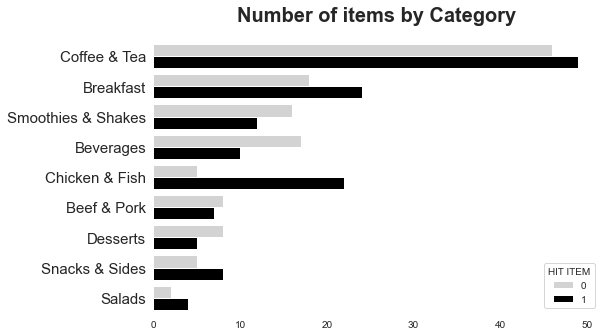

In [1131]:
# Plot the number of items per category with the "Hit Item" column indicated
fig, ax = plt.subplots(figsize=(8, 5))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.countplot(data = menu, y = 'CATEGORY', hue = 'HIT ITEM', 
              order = menu.CATEGORY.value_counts().index, palette=["lightgrey", "black"])
plt.gca().spines[ ["right", "left", "top", "bottom"] ].set_visible(False)  
plt.xlabel(None)
plt.ylabel(None)
plt.yticks(size=15)
plt.xticks(None)
plt.title("Number of items by Category", size=20, fontweight="bold", x=0.5, y=1.05)

# Chicken & Fish, Coffee & Tea, Breakfast, Snacks & Sides, and Salads can be viewed as consumer prefered categories

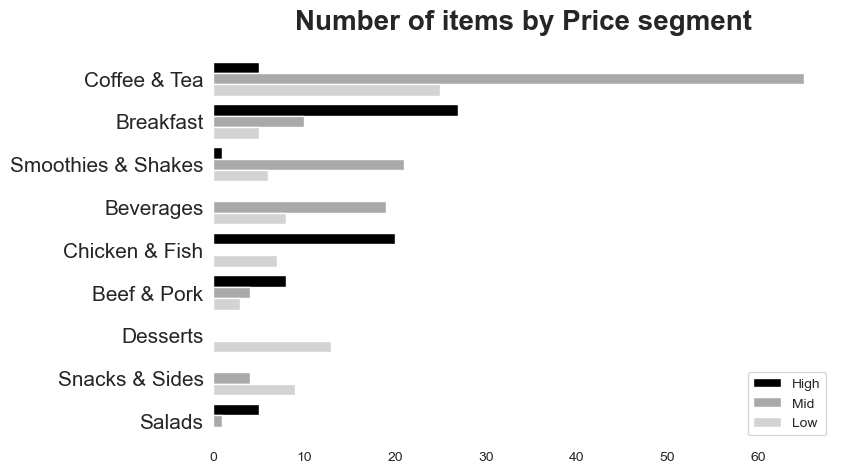

In [588]:
# Plot the number of items per category with the "Price segment" column indicated
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data = menu, y = 'CATEGORY', hue = 'PRICE SEG',
              order = menu.CATEGORY.value_counts().index, palette=["black", "darkgray", "lightgray"])
plt.gca().spines[ ["right", "left", "top", "bottom"] ].set_visible(False)  
plt.xlabel(None)
plt.ylabel(None)
plt.yticks(size=15)
plt.xticks(None)
plt.title("Number of items by Price segment", size=20, fontweight="bold", x=0.5, y=1.05)
plt.legend(loc="lower right")

# Breakfast, Chicken & Fish, Beef & Pork, and Salads can be viewed as premium categories

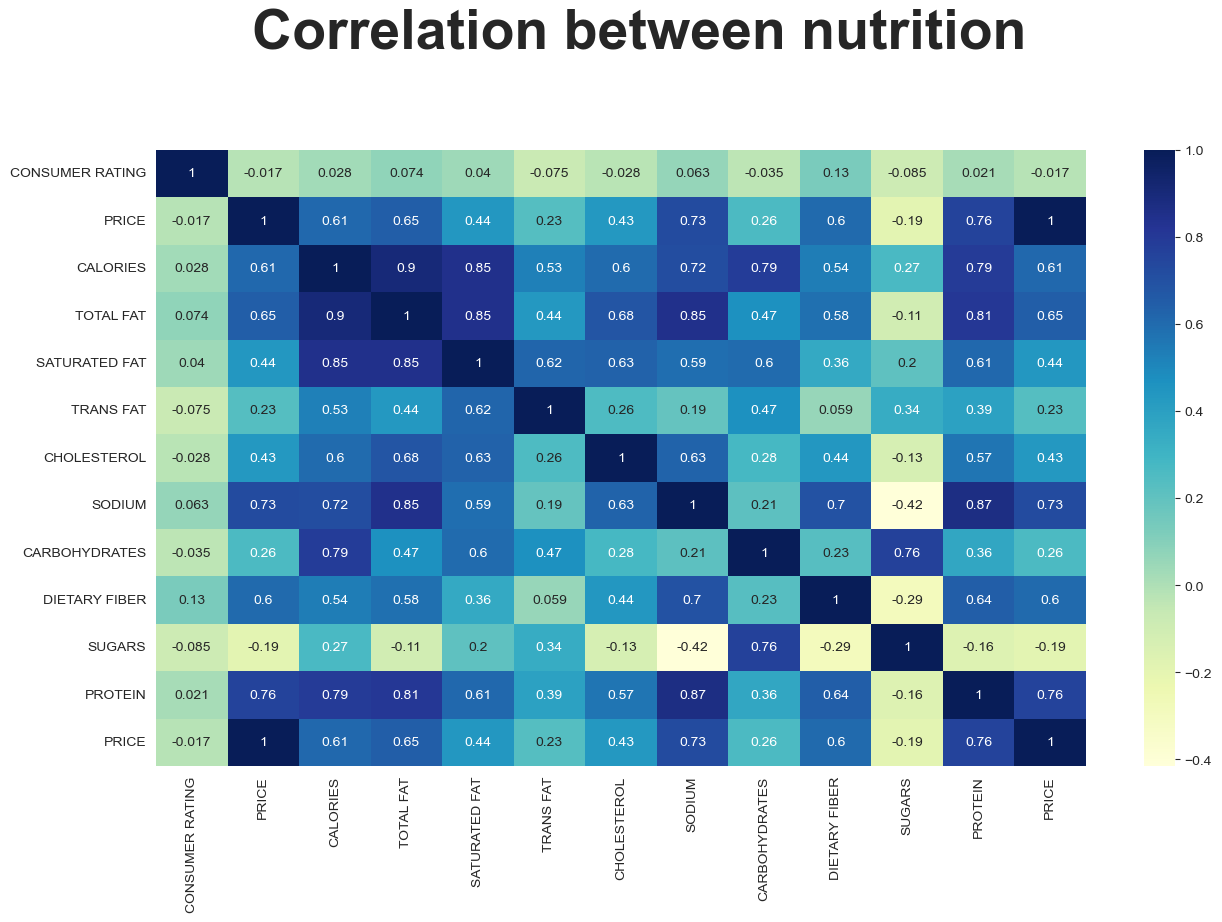

In [596]:
# Check the correlation between nutrition

menu_nutrition = menu[['CALORIES','TOTAL FAT', 'SATURATED FAT', 'TRANS FAT', 'CHOLESTEROL','SODIUM','CARBOHYDRATES','DIETARY FIBER','SUGARS', 'PROTEIN']]

fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(menu_updated.corr(),annot=True, cmap="YlGnBu")
plt.title("Correlation between nutrition", fontsize=40, x=0.52, y=1.15, fontweight="bold")
plt.show()


Text(0.4, 1.0, 'Calories')

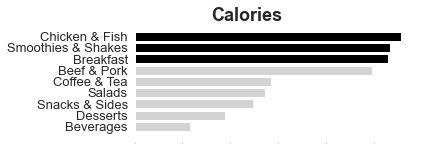

In [1132]:
# Calorie and total fat have higher average correlation coefficients than others
# Cholesterol is considered as one of the key nutritional factor to be monitored

# The team decided to compare these nutrition between menu category

# For calories,
menu_cal=menu.groupby("CATEGORY")["CALORIES"].mean().sort_values().round(0)
menu_cal=pd.DataFrame(menu_cal)
bar_x=list(menu_cal.index)

fig, ax = plt.subplots(figsize=(5, 2))
plt.barh(y=bar_x, width=menu_cal["CALORIES"],color=["lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "black", "black", "black"])
plt.gca().spines[ ["right", "left", "top", "bottom"] ].set_visible(False)  
plt.xticks(fontsize=0)
plt.yticks(fontsize=13)
plt.title("Calories", x=0.4, fontweight="bold", fontsize=18)

# Top 3 categories are Chicken & Fish, Smoothies & Shakes, and Breakfast

Text(0.4, 1.0, 'Total fat')

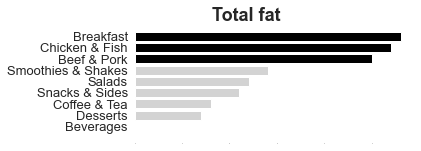

In [1133]:
# For total fat,
menu_fat=menu.groupby("CATEGORY")["TOTAL FAT"].mean().sort_values().round(0)
menu_fat=pd.DataFrame(menu_fat)
bar_x=list(menu_fat.index)

fig, ax = plt.subplots(figsize=(5, 2))
plt.barh(y=bar_x, width=menu_fat["TOTAL FAT"],color=["lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "black", "black", "black"])
plt.gca().spines[ ["right", "left", "top", "bottom"] ].set_visible(False)  
plt.xticks(fontsize=0)
plt.yticks(fontsize=13)
plt.title("Total fat", x=0.4, fontweight="bold", fontsize=18)

# Top 3 categories are Breakfast, Chicken & Fish, and Beer & Pork

Text(0.4, 1.0, 'Cholesterol')

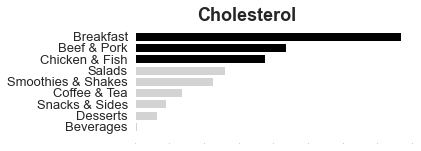

In [1134]:
# For cholesterol,
menu_chol=menu.groupby("CATEGORY")["CHOLESTEROL"].mean().sort_values().round(0)
menu_chol=pd.DataFrame(menu_chol)
bar_x=list(menu_chol.index)

fig, ax = plt.subplots(figsize=(5, 2))
plt.barh(y=bar_x, width=menu_chol["CHOLESTEROL"],color=["lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "black", "black", "black"])
plt.gca().spines[ ["right", "left", "top", "bottom"] ].set_visible(False)  
plt.xticks(fontsize=0)
plt.yticks(fontsize=13)
plt.title("Cholesterol", x=0.4, fontweight="bold", fontsize=18)

# Top 3 categories are Breakfast, Beef & Pork, and Chicken & Fish

In [616]:
#these are the 10 items with maximum amount of Calories and their consumer rating.
menu[['CALORIES','ITEM','CONSUMER RATING','HIT ITEM']].sort_values(by='CALORIES', ascending=False).head(10)

,CALORIES,ITEM,CONSUMER RATING,HIT ITEM
92,1880,Chicken McNuggets (40 piece),4.2,Yes
54,1150,Big Breakfast with Hotcakes (Large Biscuit),3.3,No
55,1090,Big Breakfast with Hotcakes (Regular Biscuit),3.1,No
56,1050,Big Breakfast with Hotcakes and Egg Whites (La...,3.5,No
57,990,Big Breakfast with Hotcakes and Egg Whites (Re...,3.6,No
90,940,Chicken McNuggets (20 piece),4.2,Yes
234,930,McFlurry with M&M Candies (Medium),3.6,No
247,850,Strawberry Shake (Large),4.0,Yes
228,850,Chocolate Shake (Large),5.0,Yes
242,820,Shamrock Shake (Large),2.9,No


In [617]:
#these are the items with maximum amount of trans fat and their consumer rating.
menu[['TRANS FAT','ITEM','CONSUMER RATING','HIT ITEM']].sort_values(by='TRANS FAT', ascending=False).head(10)

,TRANS FAT,ITEM,CONSUMER RATING,HIT ITEM
6,2.5,Double Quarter Pounder with Cheese,2.0,No
0,1.5,Bacon Clubhouse Burger,3.8,No
11,1.5,Quarter Pounder Deluxe,3.2,No
126,1.5,Frappe Chocolate Chip (Large),3.5,No
14,1.5,Quarter Pounder with Cheese,3.4,No
13,1.5,Quarter Pounder with Bacon Habanero Ranch,3.3,No
123,1.5,Frappe Caramel (Large),3.9,Yes
12,1.5,Quarter Pounder with Bacon & Cheese,3.2,No
83,1.5,"Steak, Egg & Cheese Bagel",4.0,Yes
92,1.0,Chicken McNuggets (40 piece),4.2,Yes


In [618]:
#these are the items with maximum amount of TOTAL FAT and their consumer rating.
menu_updated[['TOTAL FAT','ITEM','CONSUMER RATING','HIT ITEM']].sort_values(by='TOTAL FAT', ascending=False).head(10)

,TOTAL FAT,ITEM,CONSUMER RATING,HIT ITEM
92,118.0,Chicken McNuggets (40 piece),4.2,Yes
54,60.0,Big Breakfast with Hotcakes (Large Biscuit),3.3,No
90,59.0,Chicken McNuggets (20 piece),4.2,Yes
55,56.0,Big Breakfast with Hotcakes (Regular Biscuit),3.1,No
50,52.0,Big Breakfast (Large Biscuit),3.2,No
56,50.0,Big Breakfast with Hotcakes and Egg Whites (La...,3.5,No
51,48.0,Big Breakfast (Regular Biscuit),3.1,No
57,46.0,Big Breakfast with Hotcakes and Egg Whites (Re...,3.6,No
6,43.0,Double Quarter Pounder with Cheese,2.0,No
52,41.0,Big Breakfast with Egg Whites (Large Biscuit),3.4,No


In [619]:
#these are the items with maximum amount of SODIUM and their consumer rating.
menu[['SODIUM','ITEM','CONSUMER RATING','HIT ITEM']].sort_values(by='SODIUM', ascending=False).head(10)

,SODIUM,ITEM,CONSUMER RATING,HIT ITEM
92,3600,Chicken McNuggets (40 piece),4.2,Yes
56,2290,Big Breakfast with Hotcakes and Egg Whites (La...,3.5,No
54,2260,Big Breakfast with Hotcakes (Large Biscuit),3.3,No
57,2170,Big Breakfast with Hotcakes and Egg Whites (Re...,3.6,No
55,2150,Big Breakfast with Hotcakes (Regular Biscuit),3.1,No
90,1800,Chicken McNuggets (20 piece),4.2,Yes
86,1720,Bacon Clubhouse Crispy Chicken Sandwich,4.5,Yes
52,1700,Big Breakfast with Egg Whites (Large Biscuit),3.4,No
50,1680,Big Breakfast (Large Biscuit),3.2,No
53,1590,Big Breakfast with Egg Whites (Regular Biscuit),3.4,No


<AxesSubplot:xlabel='CALORIES', ylabel='HIT ITEM'>

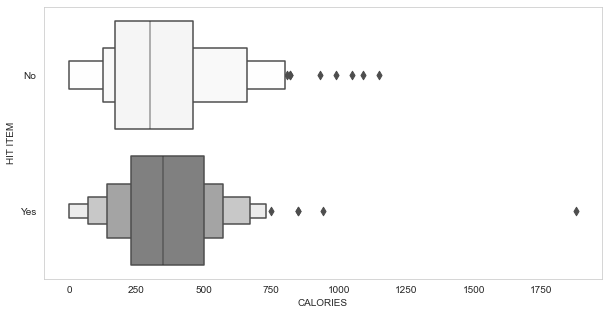

In [1141]:
# Compare nutrition facts between "Hit items" and "Regular items"

# For calories,
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.boxenplot(menu["CALORIES"], menu['HIT ITEM'], palette=["whitesmoke", "gray"])

# We can see "Hit items" have more calories than "Regular items"

<AxesSubplot:xlabel='TOTAL FAT', ylabel='HIT ITEM'>

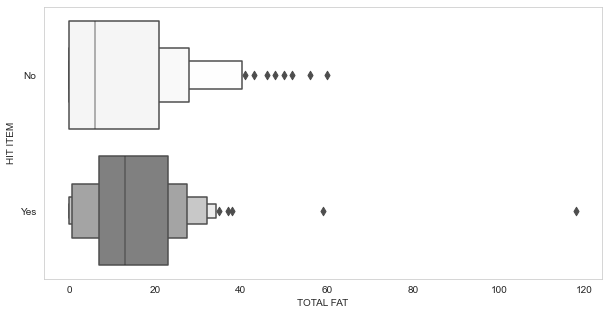

In [1142]:
# For total fat,
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.boxenplot(menu["TOTAL FAT"], menu['HIT ITEM'], palette=["whitesmoke", "gray"])

# We can see "Hit items" have more fat than "Regular items"

<AxesSubplot:xlabel='CHOLESTEROL', ylabel='HIT ITEM'>

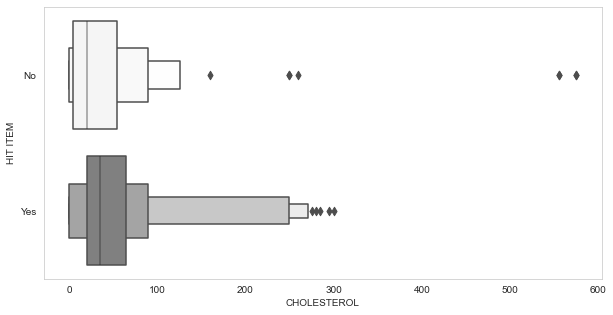

In [1143]:
# For cholesterol,
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.boxenplot(menu["CHOLESTEROL"], menu['HIT ITEM'], palette=["whitesmoke", "gray"])

# We can see "Hit items" have more cholesterol than "Regular items"

# Analysis - Clustering (K Mean Clustering)

In [631]:
# In order to develop the product strategy for the company
# we decided to cluster the entire menu so that we can have a detailed perspective on the menu


# first, change the "HIT ITEM" data to numerical 0 and 1 (Hit = 1, No = 0)

from scipy.stats import zscore, norm
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
menu['HIT ITEM'] = enc.fit_transform(menu['HIT ITEM']).astype(int)

In [743]:
# divide the data into predictor and dependent variable

X = menu.drop(['HIT ITEM',"YEAR", "PRICE SEG", "SERVING SIZE", "SIZE UNIT", 'CATEGORY','ITEM', 'TOTAL FAT (% DAILY VALUE)',
              'SATURATED FAT (% DAILY VALUE)', 'CHOLESTEROL (% DAILY VALUE)', 'CALORIES FROM FAT',
              'SODIUM (% DAILY VALUE)', 'CARBOHYDRATES (% DAILY VALUE)',
              'DIETARY FIBER (% DAILY VALUE)', 'VITAMIN A (% DAILY VALUE)',
              'VITAMIN C (% DAILY VALUE)', 'CALCIUM (% DAILY VALUE)',
               'IRON (% DAILY VALUE)'], axis=1)
print('Independent variables are:', X.shape)
y = menu['HIT ITEM']
print('Dependent variable is:',y.shape)

Independent variables are: (266, 13)
Dependent variable is: (266,)


In [744]:
# Change data type of variables for the purpose of the analysis efficiency
X['CALORIES'] = X['CALORIES'].astype(float)
X['PRICE'] = X['PRICE'].astype(float)
X['CONSUMER RATING'] = X['CONSUMER RATING'].astype(float)
X['CHOLESTEROL'] = X['CHOLESTEROL'].astype(float)
X['SODIUM'] = X['SODIUM'].astype(float)
X['CARBOHYDRATES'] = X['CARBOHYDRATES'].astype(float)
X['DIETARY FIBER'] = X['DIETARY FIBER'].astype(float)
X['SUGARS'] = X['SUGARS'].astype(float)
X['PROTEIN'] = X['PROTEIN'].astype(float)

In [745]:
# Now, Using Standard Scaler to standardize the values of each column. 
# This is required in order to bring the input variables on same scale, 
# which might be on different scales in the raw form

print('*******Details of column before standardising:********\n', X.describe().T)

X_std = pd.DataFrame(StandardScaler().fit_transform(X))
X_std.columns = X.columns #the column names are passed to the standardized dataframe
print('\n')
print('*******Details of column AFTER standardising:********\n', X_std.describe().T)

*******Details of column before standardising:********
                  count        mean         std   min     25%     50%     75%  \
PRICE            266.0    3.126353    1.491650  0.89    2.00    2.79    3.59   
CONSUMER RATING  266.0    3.861654    0.648856  2.00    3.40    3.90    4.30   
CALORIES         266.0  363.308271  239.776143  0.00  200.00  335.00  480.00   
TOTAL FAT        266.0   13.973684   14.100424  0.00    3.50   11.00   22.00   
SATURATED FAT    266.0    5.924812    5.289183  0.00    1.50    5.00    9.75   
TRANS FAT        266.0    0.199248    0.425329  0.00    0.00    0.00    0.00   
CHOLESTEROL      266.0   53.928571   86.534313  0.00    5.00   30.00   65.00   
SODIUM           266.0  487.781955  572.864176  0.00  111.25  185.00  857.50   
CARBOHYDRATES    266.0   46.778195   28.180544  0.00   30.00   43.50   60.00   
DIETARY FIBER    266.0    1.616541    1.552706  0.00    0.00    1.00    2.75   
SUGARS           266.0   29.045113   28.462319  0.00    6.00   1

C:\Users\jwshin\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

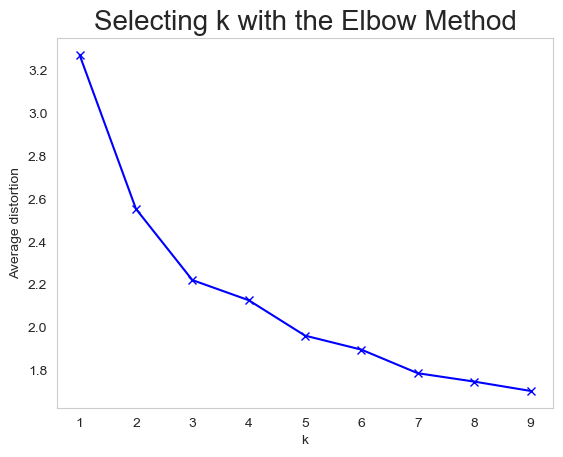

In [746]:
# We'll now be performing unsupervised learning method on our dataset and make clusters of like minded Customers.
# We'll be using Kmeans algorithm to cluster the data:

# we have already standardised the data:
# we will find the best k value from the elbow method:

# now, for K-means clustering, we'll try to find the best number for 'K'.
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans


from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_std)
    prediction=model.predict(X_std)
    meanDistortions.append(sum(np.min(cdist(X_std, model.cluster_centers_, 'euclidean'), axis=1)) / 
                           X_std.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

In [747]:
# from above graph, we can see that the best values of K can either be 2, 3 or 4 
# we'll use both values for models and find the best fit :)

# first, check the case with k=2
final_model=KMeans(2)
final_model.fit(X_std)
prediction=final_model.predict(X_std)

#Appending the predictions to the dataset 
#X_std["Pred"] = prediction
X_std["Pred"] = prediction
print("Groups Assigned : \n")
X_std.sample(5)

Groups Assigned : 



,PRICE,CONSUMER RATING,CALORIES,TOTAL FAT,SATURATED FAT,TRANS FAT,CHOLESTEROL,SODIUM,CARBOHYDRATES,DIETARY FIBER,SUGARS,PROTEIN,Tier,Pred
239,-0.964744,1.140064,-0.097392,-0.211291,0.014242,-0.469339,-0.277042,-0.520792,0.221200,-0.397824,0.491218,-0.445859,-0.733345,0
234,-0.494581,-0.404014,2.367875,1.351887,2.666143,1.886212,0.243963,-0.398369,3.278703,0.247427,3.483252,0.606790,0.066121,1
82,0.445746,1.294472,0.278666,0.641352,0.582507,1.886212,2.848989,0.825864,-0.560952,1.537929,-0.916798,1.133115,1.665053,1
65,1.789070,-0.404014,0.654724,0.712405,0.203664,-0.469339,-0.045485,0.773397,0.505619,0.892678,-0.529594,0.168186,1.665053,1
46,1.815937,-0.712830,0.445803,0.783459,1.150771,-0.469339,-0.219153,1.630361,-0.169876,0.892678,-0.881598,0.606790,1.665053,1


In [748]:
#pred values in array
lables = final_model.labels_

In [749]:
# Calculate the Silhouttee coefficient of K=2 model to measure the performance

from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(X_std,lables)
print('The score of K=2 clustering from Silhouette cofficient metric comes out to be:\n',
      silhouette_score(X_std,lables) )


The score of K=2 clustering from Silhouette cofficient metric comes out to be:
 0.38730253726474173


In [750]:
# Now, move on to the case with k=3
final_model=KMeans(3)
final_model.fit(X_std)
prediction=final_model.predict(X_std)

#Appending the predictions to the dataset 
#X_std["Pred"] = prediction
X_std["Pred"] = prediction
print("Groups Assigned : \n")
X_std.sample(5)

Groups Assigned : 



,PRICE,CONSUMER RATING,CALORIES,TOTAL FAT,SATURATED FAT,TRANS FAT,CHOLESTEROL,SODIUM,CARBOHYDRATES,DIETARY FIBER,SUGARS,PROTEIN,Tier,Pred
160,-0.158750,-1.021646,-0.306313,-0.637612,-0.459312,-0.469339,-0.392821,-0.590749,0.114543,-0.397824,0.491218,-0.270417,-0.733345,2
196,0.512912,-1.484869,-0.598802,-0.957353,-1.122287,-0.469339,-0.508600,-0.433347,-0.312086,0.247427,-0.283191,0.255907,-0.733345,2
183,-0.494581,-1.021646,-0.682370,-0.992880,-1.122287,-0.469339,-0.566490,-0.660705,-0.205429,-0.397824,0.350416,-0.270417,-0.733345,2
149,-0.561747,-2.720132,-0.348097,-0.744192,-0.743444,-0.469339,-0.450711,-0.538281,0.114543,-0.397824,0.596819,-0.094976,-0.733345,2
222,0.848744,-0.095199,-0.933075,-0.673139,-0.743444,-0.469339,-0.508600,-0.590749,-0.952028,2.828431,-0.811197,-0.621301,-0.733345,2


In [751]:
# Calculate the Silhouttee coefficient of K=3 model to measure the performance

from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(X_std,lables)
print('The score of K=3 clustering from Silhouette cofficient metric comes out to be:\n',
      silhouette_score(X_std,lables) )

The score of K=3 clustering from Silhouette cofficient metric comes out to be:
 0.3935410805096353


In [752]:
# Lastly, run the model with k=4
final_model=KMeans(4)
final_model.fit(X_std)
prediction=final_model.predict(X_std)

#Appending the predictions to the dataset 
#X_std["Pred"] = prediction
X_std["Pred"] = prediction
print("Groups Assigned : \n")
X_std.sample(5)

Groups Assigned : 



,PRICE,CONSUMER RATING,CALORIES,TOTAL FAT,SATURATED FAT,TRANS FAT,CHOLESTEROL,SODIUM,CARBOHYDRATES,DIETARY FIBER,SUGARS,PROTEIN,Tier,Pred
126,-0.084867,-0.558422,1.657544,1.209780,2.666143,3.063987,0.475521,-0.503303,2.283237,-0.397824,2.462440,-0.094976,0.066121,2
255,-1.031910,-0.867238,-0.431665,-0.424451,-0.459312,-0.469339,-0.161264,0.371149,-0.596505,-0.397824,-0.775997,0.255907,-0.733345,0
46,1.815937,-0.712830,0.445803,0.783459,1.150771,-0.469339,-0.219153,1.630361,-0.169876,0.892678,-0.881598,0.606790,1.665053,3
194,-0.158750,-1.176054,-0.974860,-0.992880,-1.122287,-0.469339,-0.566490,-0.616982,-0.987581,-0.397824,-0.459193,-0.094976,-0.733345,0
3,-0.964744,-0.558422,-0.306313,-0.211291,-0.175179,0.708436,-0.103374,0.336171,-0.489847,0.247427,-0.775997,0.168186,-0.733345,0


In [753]:
# Calculate the Silhouttee coefficient of K=4 model to measure the performance

from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(X_std,lables)
print('The score of K=4 clustering from Silhouette cofficient metric comes out to be:\n',
      silhouette_score(X_std,lables) )

# As can be seen above, the model performance is best when K=4

The score of K=4 clustering from Silhouette cofficient metric comes out to be:
 0.434532971754067


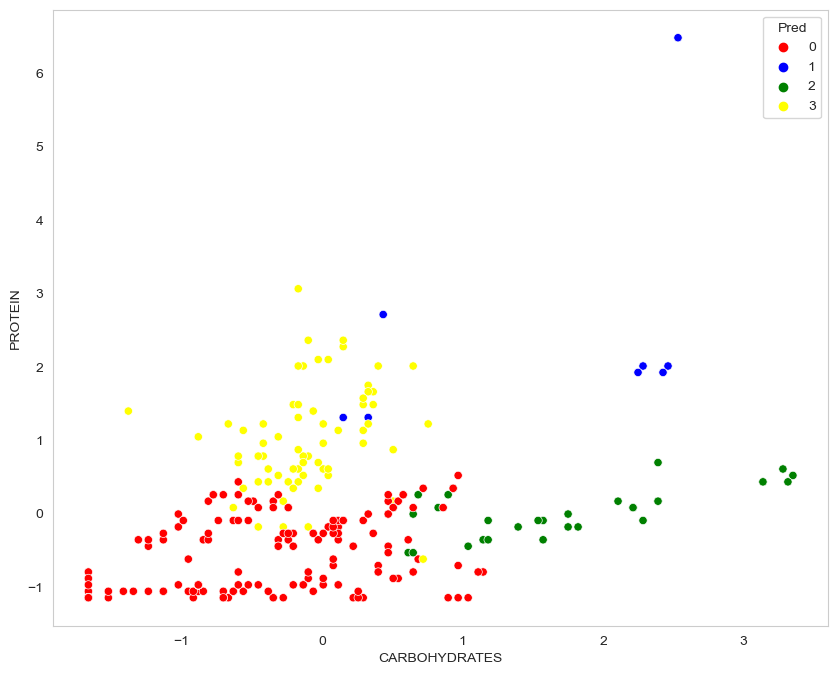

In [754]:
# Plot the entire data with each cluster indicated
plt.figure(figsize=(10, 8))
sns.scatterplot(x="CARBOHYDRATES", y="PROTEIN", hue="Pred",
              data=X_std, palette=['red','blue','green','yellow']);

In [755]:
# Create a column named "TIER" indicating assigned cluster of each menu
menu["TIER"]=X_std["Pred"]

In [767]:
# Based on the mean value of "PRICE" and "CONSUMER RATING"
# rename each cluster for the purpose of the analysis efficiency

menu.groupby("TIER")["PRICE"].mean()
menu.groupby("TIER")["CONSUMER RATING"].mean()

# for each cluster name assigned,
# 3 -> 1st tier, 2 -> 2nd tier, 1 -> 3rd tier, 0 -> 4th tier
for i in range(len(menu)):
    if menu["TIER"][i] == 3:
        menu["TIER"][i] = "1st"
    elif menu["TIER"][i] == 1:
        menu["TIER"][i] = "2nd"
    elif menu["TIER"][i] == 2:
        menu["TIER"][i] = "3rd"
    else:
        menu["TIER"][i] = "4th"
    
# 1st tier items have both high consumer preference and price
# 2nd tier items have low consumer preference and high price
# 3rd tier items have high consumer preference and low price
# 4th tier items have low consumer preference and low price

C:\Users\jwshin\AppData\Local\Temp\ipykernel_1724\2585620560.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  menu["TIER"][i] = "1st"


In [779]:
# The current distribution of tiers is as below
menu["TIER"].value_counts().sort_index()

1st     68
2nd      8
3rd     31
4th    159
Name: TIER, dtype: int64

In [775]:
# number of items in the 1st cluster by category
menu[menu["TIER"]=="1st"].groupby("CATEGORY")["ITEM"].count().sort_values(ascending=False)

CATEGORY
Breakfast         29
Chicken & Fish    21
Beef & Pork       13
Salads             4
Snacks & Sides     1
Name: ITEM, dtype: int64

In [776]:
# number of items in the 2nd cluster by category
menu[menu["TIER"]=="2nd"].groupby("CATEGORY")["ITEM"].count().sort_values(ascending=False)

CATEGORY
Breakfast         6
Chicken & Fish    2
Name: ITEM, dtype: int64

In [777]:
# number of items in the 3rd cluster by category
menu[menu["TIER"]=="3rd"].groupby("CATEGORY")["ITEM"].count().sort_values(ascending=False)

CATEGORY
Smoothies & Shakes    16
Coffee & Tea          15
Name: ITEM, dtype: int64

In [778]:
# number of items in the 4th cluster by category
menu[menu["TIER"]=="4th"].groupby("CATEGORY")["ITEM"].count().sort_values(ascending=False)

CATEGORY
Coffee & Tea          80
Beverages             27
Desserts              13
Smoothies & Shakes    12
Snacks & Sides        12
Breakfast              7
Chicken & Fish         4
Beef & Pork            2
Salads                 2
Name: ITEM, dtype: int64

In [780]:
# Based on the result, the team set up the strategic direction for each cluster

# 1st tier items are very well positioned, so they should keep it up

# 2nd tier items have unstable premium position, so the company needs to boost consumer preference of them

# 3rd tier items have room for a price increase, so the company should make them premium menu

# 4th tier items have low value for the company, so the company should consider exit or restructuring

# Analysis - Regression

In [ ]:
# To check the feasibility of the strategic direction,
# The team set up three questions to be answered

# regarding the price-increase of the 3rd tier items,
# 1. Will price-increase hurt the consumer preference?

# regarding the consumer preference boost of the 2nd tier items,
# 2. Can additional serving sizes of food boost consumer preference?
# 3. Can nutritional adjustment for the menu boost consumer preference?

In [ ]:
# "1. Will price-increase hurt the consumer preference? " was answered with Weka
# and it turns out that the price increase can hurt the consumer preference

In [802]:
# Conduct linear regression for
# "2. Can additional serving sizes of food boost consumer preference?"
# "3. Can nutritional adjustment for the menu boost consumer preference?

In [826]:
DF1s.columns

Index(['YEAR', 'PRICE', 'CONSUMER RATING', 'SERVING SIZE', 'PC1', 'PC2', 'PC3',
       'PC4', 'PC5', 'PC6'],
      dtype='object')

In [829]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

df1 = menu_pca.copy()
df3 = menu.copy() 
DF1 = pd.DataFrame(df1)
regr = linear_model.LinearRegression()

#Dropping String Columns in DF3 and DF1
DF1s = DF1.drop(["CATEGORY", "ITEM", "HIT ITEM", "SIZE UNIT"], axis=1)
DF3s = df3.drop(['HIT ITEM','CATEGORY','ITEM', "PRICE SEG", "SIZE UNIT", "TIER"], axis=1)

# Standardize dataframe
DF3S = pd.DataFrame(StandardScaler().fit_transform(DF3s))
DF1S = pd.DataFrame(StandardScaler().fit_transform(DF1s))

In [832]:
# Reassigning Columns
DF3S.columns = DF3s.columns
DF1S.columns = DF1s.columns

In [833]:
# Importing stats and sma for p-values, The following p-value calculations are using the STANDARDIZED data
from scipy import stats
import statsmodels.api as sma

In [836]:
#Multiple Linear regression for PCA vs Consumer Rating coefficients
x = np.array(DF1S[['PC1','PC2','PC3','PC4','PC5','PC6']])
y = np.array(DF1S['CONSUMER RATING'])
model1 = LinearRegression()
model1.fit(x,y)
print("\nThe linear regression coefficients for PC1  ~ PC6 are:\n",model1.coef_)

# The p values for PCA vs Consumer Rating 
x1 = DF1S[['PC1','PC2','PC3','PC4','PC5','PC6']]
y1 = DF1S['CONSUMER RATING']
x3 = sma.add_constant(x)
lm = LinearRegression()
lm.fit(x1,y1)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(x1)
new_X = np.append(np.ones((len(x1),1)), x1, axis=1)
M_S_E = (sum((y1-predictions)**2))/(len(new_X)-len(new_X[0]))
v_b = M_S_E*(np.linalg.inv(np.dot(new_X.T,new_X)).diagonal())
s_b = np.sqrt(v_b)
t_b = params/ s_b
p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X)-len(new_X[0])))) for i in t_b]
p_val = np.round(p_val,3)
print("This is the p value for PC1 ~ PC6 in relation to Consumer rating is:",p_val)

#Multiple Linear regression for PCA vs Consumer Rating coefficients
x = np.array(DF1S[['PC1','PC2','PC3','PC4','PC5','PC6']])
y = np.array(DF1S['CONSUMER RATING'])
model1 = LinearRegression()
model1.fit(x,y)
print("\nThe linear regression coefficients for PC1  ~ PC6 are:\n",model1.coef_)

# PC4 has statistical significance towards the consumer rating in a negative way
# It can be interpreted that nutritional adjustment can increase the consumre rating


The linear regression coefficients for PC1  ~ PC6 are:
 [ 0.04334709 -0.11032096  0.10809595  0.12807859  0.01344383  0.06938919]
This is the p value for PC1 ~ PC6 in relation to Consumer rating is: [1.    0.475 0.07  0.076 0.036 0.825 0.254]

The linear regression coefficients for PC1  ~ PC6 are:
 [ 0.04334709 -0.11032096  0.10809595  0.12807859  0.01344383  0.06938919]


In [837]:
# The p values for Serving Size vs Consumer Rating
x1 = DF3S[['SERVING SIZE']]
y1 = DF3S['CONSUMER RATING']
x3 = sma.add_constant(x)
lm = LinearRegression()
lm.fit(x1,y1)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(x1)
new_X = np.append(np.ones((len(x1),1)), x1, axis=1)
M_S_E = (sum((y1-predictions)**2))/(len(new_X)-len(new_X[0]))
v_b = M_S_E*(np.linalg.inv(np.dot(new_X.T,new_X)).diagonal())
s_b = np.sqrt(v_b)
t_b = params/ s_b
p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X)-len(new_X[0])))) for i in t_b]
p_val = np.round(p_val,3)
print("This is the p value for Serving Size in relation to Consumer rating is:",p_val)
      
#Linear regression for Serving Size vs Consumer Rating
xs = np.array(DF3S['SERVING SIZE']).reshape((-1,1))
ys = np.array(DF3S['CONSUMER RATING'])

#Linear regression
model1 = LinearRegression()
model1.fit(xs,ys)
print("\nThe linear regression coefficient for Serving Size vs Consumer rating is:",model1.coef_)
print("\nThe R-squared value for Serving Size vs Consumer Rating is:", round(model1.score(xs,ys),4))

# Serving size has statistical significance towards the consumer rating in a negative way
# It can be interpreted that additional serving size can decrease the consumre rating

This is the p value for Serving Size in relation to Consumer rating is: [1.    0.017]

The linear regression coefficient for Serving Size vs Consumer rating is: [-0.14641999]

The R-squared value for Serving Size vs Consumer Rating is: 0.0214


# Analysis - Decision Tree

In [ ]:
# To further investigate the nutritional adjustment, a decision tree analysis was conducted using Weka
# and it turns that nutritional adjustment for calories from fat, saturated fat, and protein could boost consumer preference

# Analysis - Proportion of items by tier

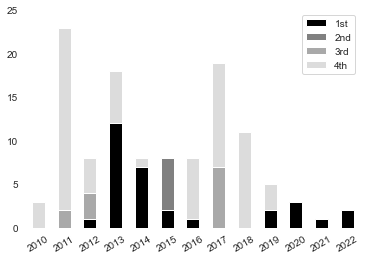

In [998]:
# Show the proportion of items launched every year

items_year=menu[["YEAR", "TIER"]].sort_values(by="YEAR").groupby("YEAR").value_counts().unstack().fillna(0).astype("int").iloc[24:]

items_year.plot(kind="bar", stacked=True, color=["black", "gray", "darkgray", "gainsboro"])
plt.xlabel("")
plt.ylim(0,25)
plt.xticks(rotation=30)
plt.gca().spines[ ["right", "left", "top", "bottom"] ].set_visible(False) 
plt.legend(loc="upper right")

# The number of items has been decreasing

Text(0.5, 0, '')

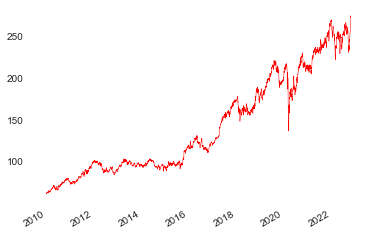

In [1000]:
# Plot the stock price of the company

data.DataReader(name="MCD", data_source="yahoo", start="2010-01-01", end="2022-10-31")["Close"].plot(color="red", linewidth=0.5)
plt.gca().spines[ ["right", "left", "top", "bottom"] ].set_visible(False) 
plt.xlabel("")

# It seems like the number of items launched in each year does not affect the stock price

Text(0, 0.5, '')

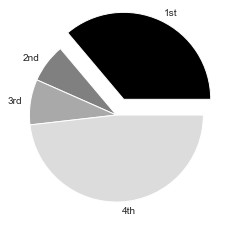

In [1040]:
# Plot the item proportion for the last 10 year

items_year.iloc[-10:].sum(axis=0).plot(kind="pie", startangle=0, explode=[0.2,0,0,0], colors=["black", "gray", "darkgray", "gainsboro"])
plt.xticks(fontsize=30)
plt.ylabel("")

In [1129]:
items_year.iloc[-10:].sum(axis=0)

TIER
1st    30
2nd     6
3rd     7
4th    40
dtype: int64

In [1127]:
# Set up the next 5 year goal of the item proportion
items_goal=items_year.iloc[-10:].sum(axis=0).copy()
items_goal[0]=items_goal.iloc[0]*1.1

Text(0, 0.5, '')

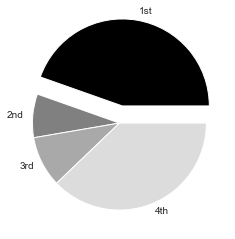

In [1128]:
items_goal[3]=items_goal.iloc[3]*0.7

items_goal.plot(kind="pie", startangle=0, explode=[0.2,0,0,0], colors=["black", "gray", "darkgray", "gainsboro"])
plt.xticks(fontsize=30)
plt.ylabel("")

# The proportion of the 1st tier item increases 9%p
# The proportion of the 2st tier item increases 1%p
# The proportion of the 3rd tier item increases 1%p
# The proportion of the 4th tier item decreases 10%p

# EOD